In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def collide(ab, weights):
  a = ab[0]
  b = ab[1]

  newWeights = [0,0,0]

  i = int(a+b)

  newWeights[i] = weights[i] + 2
  newWeights[(i + 1) % 3] = weights[(i + 1) % 3] - 1
  newWeights[(i + 2) % 3] = weights[(i + 2) % 3] - 1

  return newWeights


In [51]:
n = 10000

#change a,b,c and weights amounts to see different behaviours

a = 10000
b = 10000
c = 10000

total = a + b + c
amounts = [a,b,c]
particles = [1.5, 0.5, -0.5]

newamount = amounts
weights = [1,1,1]

states = [amounts]

for i in range(n):
  prob = list(np.multiply(newamount, weights))
  collision = random.choices(particles, prob, k=2)

  if (collision[0] != collision[1]):
    newamount = collide(collision, newamount)

  states.append(newamount)
  if(total in newamount):
    n = i
    break

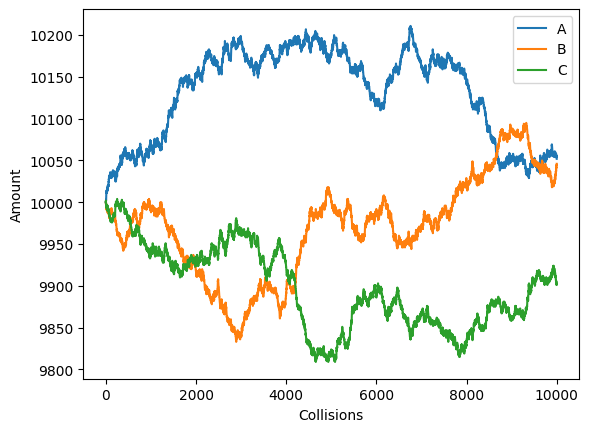

In [53]:
intervals = np.linspace(0, n, n+1)
plt.plot(intervals, states, label=["A", "B", "C"])
plt.xlabel("Collisions")
plt.ylabel("Amount")
plt.legend()
plt.show()

In [48]:
colls = []
n = 10000

#This is to check the chance of annihilation for low particle amounts
#The time to do 10 particles took 6mins, it seems exponential so anymore would take a while

for j in range(10000):
  a = 2
  b = 2
  c = 2

  total = a + b + c
  amounts = [a,b,c]

  newamount = amounts
  for i in range(n):
    prob = list(np.multiply(newamount, weights))
    collision = random.choices(particles, prob, k=2)

    if (collision[0] != collision[1]):
      newamount = collide(collision, newamount)

    if(total in newamount):
      colls.append(i)
      break

10000


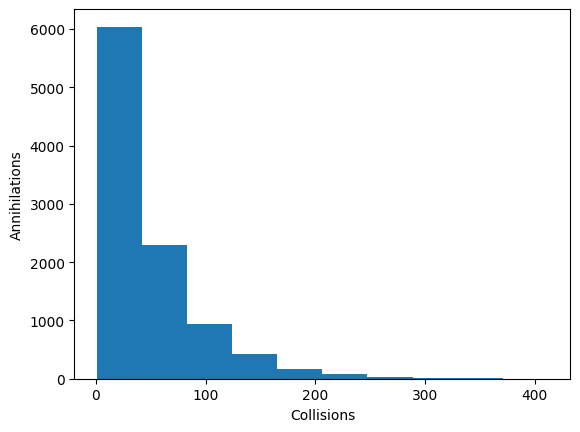

In [49]:
plt.hist(colls)
plt.xlabel("Collisions")
plt.ylabel("Annihilations")
print(len(colls))
plt.show()